# =============================Traning Datasets================ 

In [1]:
feature_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack_types"]


R2L=['warezmaster.','warezclient.','spy.','phf.','multihop.','imap.','guess_passwd.','ftp_write.']

U2R=['rootkit.','perl.','loadmodule.','buffer_overflow.']
DoS=['smurf.','teardrop.','back.','land.','neptune.','pod.']
Probe=['ipsweep.','nmap.','portsweep.','satan.']

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("kddcup.data_10_percent_corrected",names =feature_names)

In [4]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_types
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [5]:
def classify(df,attack_types):
    attack_type=[]
    for i in df['attack_types']:
        if i == 'normal.':
            attack_type.append('Normal')
        elif i in R2L:
            attack_type.append('R2L')
        elif i in U2R:
            attack_type.append('U2R')
        elif i in DoS:
            attack_type.append('DoS')
        else:
            attack_type.append('Probe')
    return attack_type
df['label']=classify(df,'attack_types')

In [6]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_types,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,Normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,Normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,Normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,Normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,Normal


## Data Size

In [7]:
df.shape

(494021, 43)

# ================== Preprocessing the dataset =====================

## Remove redundant features from dataset

In [8]:
df['num_outbound_cmds'].value_counts()
df.drop('num_outbound_cmds', axis=1, inplace=True)
df['is_host_login'].value_counts()
df.drop('is_host_login', axis=1, inplace=True)

## Transform of categorical features

In [9]:
df['protocol_type'] = df['protocol_type'].astype('category')
df['service'] = df['service'].astype('category')
df['flag'] = df['flag'].astype('category')
cat_columns = df.select_dtypes(['category']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

In [10]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_types,label
0,0,1,22,9,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,Normal
1,0,1,22,9,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,Normal
2,0,1,22,9,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,Normal
3,0,1,22,9,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,Normal
4,0,1,22,9,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,Normal


## Remove duplicates from dataframe

In [11]:
def remove_duplicate(df):
  print('Before remove duplicate shape',df.shape)
  df.drop_duplicates(subset=None, keep='first', inplace=True)
  print('After remove duplicate shape',df.shape)
  return df

In [12]:
df = remove_duplicate(df)

Before remove duplicate shape (494021, 41)
After remove duplicate shape (145586, 41)


In [13]:
df.shape

(145586, 41)

In [14]:
df.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_count                 0
dst_host_s

## Check lablel of dataset 

In [15]:
df['label'].value_counts()

Normal    87832
DoS       54572
Probe      2131
R2L         999
U2R          52
Name: label, dtype: int64

In [16]:
df['attack_types'].value_counts()

normal.             87832
neptune.            51820
back.                 968
teardrop.             918
satan.                906
warezclient.          893
ipsweep.              651
smurf.                641
portsweep.            416
pod.                  206
nmap.                 158
guess_passwd.          53
buffer_overflow.       30
warezmaster.           20
land.                  19
imap.                  12
rootkit.               10
loadmodule.             9
ftp_write.              8
multihop.               7
phf.                    4
perl.                   3
spy.                    2
Name: attack_types, dtype: int64

# ================= Exploratory data analysis =====================

## For visulization import necessary library 

In [17]:
import matplotlib.pyplot as plt
import seaborn as sn

## Distribution of attacks

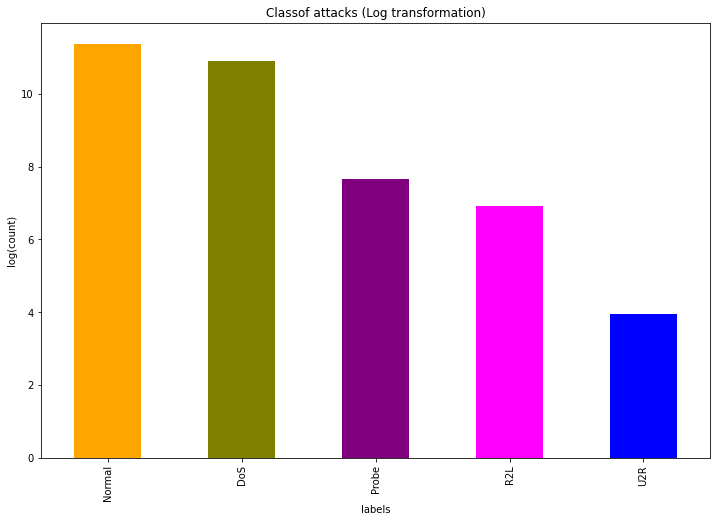

In [18]:
plt.figure(figsize=(12,8))
plt.title('Classof attacks (Log transformation)')
df['label'].value_counts().apply(np.log).plot(kind='bar', color = ['orange','Olive','purple','Fuchsia','blue'])
plt.xlabel("labels")
plt.ylabel("log(count)")
plt.show()

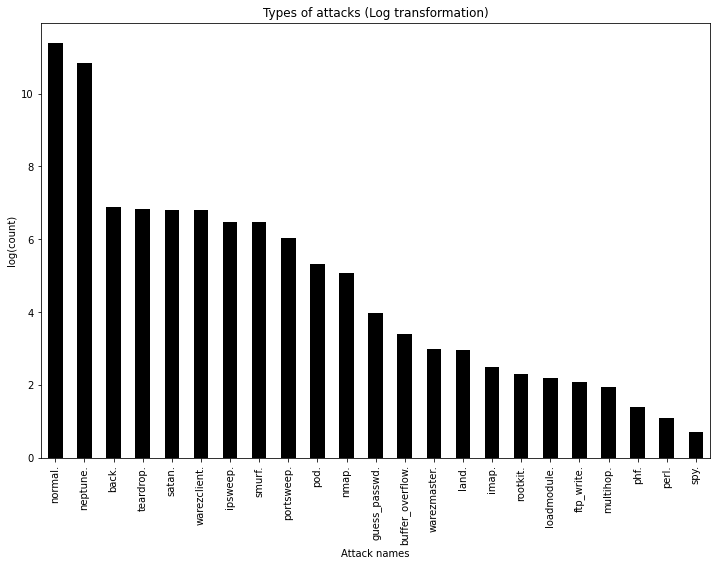

In [19]:
plt.figure(figsize=(12,8))
plt.title("Types of attacks (Log transformation)")
df['attack_types'].value_counts().apply(np.log).plot(kind='bar',color = "black")
plt.xlabel("Attack names")
plt.ylabel("log(count)")
plt.show()

In [20]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_types,label
0,0,1,22,9,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,Normal
1,0,1,22,9,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,Normal
2,0,1,22,9,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,Normal
3,0,1,22,9,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,Normal
4,0,1,22,9,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,Normal


In [21]:
df.dtypes

duration                         int64
protocol_type                     int8
service                           int8
flag                              int8
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate                float64
rerror_rate                    float64
srv_rerror_rate          

## One Hot Encoder

In [22]:
def target_feature(mydf):
  #mydf['label']= mydf['label'].value_counts().apply(np.log)  # log transformation
  target = df['label'] 
  return target

In [23]:
y= target_feature(df)

In [24]:
y.shape

(145586,)

In [25]:
from sklearn.preprocessing import label_binarize,LabelEncoder,OneHotEncoder 

In [26]:
def oneVSall(target):
  label_encoder = LabelEncoder()
  integer_encoded = label_encoder.fit_transform(target)
  onehot_encoder = OneHotEncoder(sparse=False,categories='auto')
  integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
  my_target = onehot_encoder.fit_transform(integer_encoded)
  target_vari = pd.DataFrame(my_target, columns =['Dos','Normal', 'Probe', 'R2L','U2R'] )
  return target_vari

In [27]:
y =  oneVSall(y)
y

,Dos,Normal,Probe,R2L,U2R
0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
145581,0.0,1.0,0.0,0.0,0.0
145582,0.0,1.0,0.0,0.0,0.0
145583,0.0,1.0,0.0,0.0,0.0
145584,0.0,1.0,0.0,0.0,0.0


In [28]:
X= df.drop(columns=['attack_types','label'])

In [29]:
X.shape

(145586, 39)

In [30]:
columns_names = X.columns

# ======================= Testing Dataset ===========================

In [31]:
corrected_df = pd.read_csv("corrected",names =feature_names)

In [32]:
corrected_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_types
0,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
3,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,snmpgetattack.
4,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack.


In [33]:
R2L=['warezmaster.','warezclient.','spy.','phf.','multihop.','imap.','guess_passwd.','ftp_write.','named.','sendmail.','snmpgetattack.',
    'worm.','xlock.','xsnoop.','httptunnel.']

U2R=['rootkit.','perl.','loadmodule.','buffer_overflow.','ps.','sqlattack.','xterm.']
DoS=['smurf.','teardrop.','back.','land.','neptune.','pod.','apache2.','mailbomd.','processtable.','udpstrom']
Probe=['ipsweep.','nmap.','portsweep.','satan.','mscan','saint']

# ====================== Preprocessing step =========================

In [34]:
corrected_df['label']=classify(corrected_df,'attack_types')

In [35]:
corrected_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_types,label
0,0,udp,private,SF,105,146,0,0,0,0,...,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.,Normal
1,0,udp,private,SF,105,146,0,0,0,0,...,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.,Normal
2,0,udp,private,SF,105,146,0,0,0,0,...,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.,Normal
3,0,udp,private,SF,105,146,0,0,0,0,...,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,snmpgetattack.,R2L
4,0,udp,private,SF,105,146,0,0,0,0,...,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack.,R2L


## =================== Remove redundant features from dataset ==================

In [36]:
corrected_df['num_outbound_cmds'].value_counts()
corrected_df.drop('num_outbound_cmds', axis=1, inplace=True)
corrected_df['is_host_login'].value_counts()
corrected_df.drop('is_host_login', axis=1, inplace=True)

## ================== Transform of categorical features to numerical =======================

In [37]:
corrected_df['protocol_type'] = corrected_df['protocol_type'].astype('category')
corrected_df['service'] = corrected_df['service'].astype('category')
corrected_df['flag'] = corrected_df['flag'].astype('category')
cat_columns = corrected_df.select_dtypes(['category']).columns
corrected_df[cat_columns] = corrected_df[cat_columns].apply(lambda x: x.cat.codes)

In [38]:
corrected_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_types,label
0,0,2,46,9,105,146,0,0,0,0,...,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.,Normal
1,0,2,46,9,105,146,0,0,0,0,...,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.,Normal
2,0,2,46,9,105,146,0,0,0,0,...,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.,Normal
3,0,2,46,9,105,146,0,0,0,0,...,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,snmpgetattack.,R2L
4,0,2,46,9,105,146,0,0,0,0,...,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack.,R2L


## ===================Remove duplicates from dataframe =====================

In [39]:
corrected_df = remove_duplicate(corrected_df)

Before remove duplicate shape (311029, 41)
After remove duplicate shape (77291, 41)


## ========================== Check null values in datasets =========================



In [40]:
corrected_df.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_count                 0
dst_host_s

In [41]:
corrected_df.dtypes

duration                         int64
protocol_type                     int8
service                           int8
flag                              int8
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate                float64
rerror_rate                    float64
srv_rerror_rate          

# ===================== Data Visulization =====================

## Check how many time attack are occurred

In [42]:
corrected_df['attack_types'].value_counts()

normal.             47913
neptune.            20332
guess_passwd.        1302
mscan.               1049
warezmaster.         1002
smurf.                936
satan.                860
apache2.              794
processtable.         744
back.                 386
saint.                364
snmpguess.            359
mailbomb.             308
snmpgetattack.        179
portsweep.            174
ipsweep.              155
httptunnel.           145
nmap.                  80
pod.                   45
buffer_overflow.       22
multihop.              18
named.                 17
ps.                    16
sendmail.              15
xterm.                 13
rootkit.               13
teardrop.              12
land.                   9
xlock.                  9
xsnoop.                 4
ftp_write.              3
worm.                   2
loadmodule.             2
sqlattack.              2
perl.                   2
udpstorm.               2
phf.                    2
imap.                   1
Name: attack

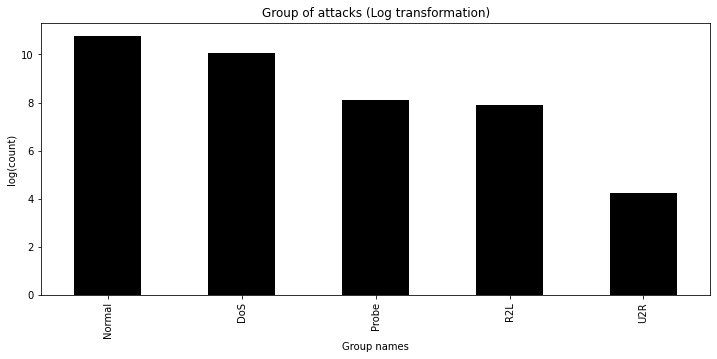

In [43]:
plt.figure(figsize=(12,5))
plt.title('Group of attacks (Log transformation)')
corrected_df['label'].value_counts().apply(np.log).plot(kind='bar',color = 'black')
plt.xlabel("Group names")
plt.ylabel("log(count)")
plt.show()

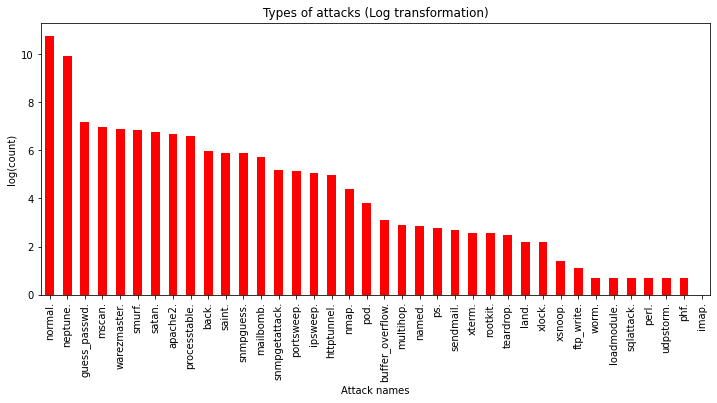

In [44]:
plt.figure(figsize=(12,5))
plt.title("Types of attacks (Log transformation)")
corrected_df['attack_types'].value_counts().apply(np.log).plot(kind='bar',color = 'red')
plt.xlabel("Attack names")
plt.ylabel("log(count)")
plt.show()

In [45]:
corrected_df.shape

(77291, 41)

In [46]:
corrected_label = corrected_df['label']

In [47]:
corrected_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_types,label
0,0,2,46,9,105,146,0,0,0,0,...,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.,Normal
3,0,2,46,9,105,146,0,0,0,0,...,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,snmpgetattack.,R2L
4,0,2,46,9,105,146,0,0,0,0,...,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack.,R2L
5,0,2,46,9,105,146,0,0,0,0,...,1.0,0.00,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack.,R2L
6,0,2,11,9,29,0,0,0,0,0,...,0.3,0.30,0.30,0.0,0.0,0.0,0.0,0.0,normal.,Normal


In [48]:
resample_data = corrected_df[columns_names]

In [49]:
 resample_data.shape,corrected_df.shape, X.shape

((77291, 39), (77291, 41), (145586, 39))

In [50]:
resample_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,2,46,9,105,146,0,0,0,0,...,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0
3,0,2,46,9,105,146,0,0,0,0,...,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0
4,0,2,46,9,105,146,0,0,0,0,...,255,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0
5,0,2,46,9,105,146,0,0,0,0,...,255,255,1.0,0.00,0.01,0.0,0.0,0.0,0.0,0.0
6,0,2,11,9,29,0,0,0,0,0,...,10,3,0.3,0.30,0.30,0.0,0.0,0.0,0.0,0.0


## Add label to dataframe

In [51]:
resample_data['label'] = corrected_label

C:\Users\HP\Anaconda3\envs\OS\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [52]:
resample_data.shape

(77291, 40)

## Remove  duplicate from dataframe

---



In [53]:
corrected_sample_df = remove_duplicate(resample_data)

Before remove duplicate shape (77291, 40)
After remove duplicate shape (77287, 40)


C:\Users\HP\Anaconda3\envs\OS\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [54]:
corrected_sample_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,2,46,9,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,Normal
3,0,2,46,9,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,R2L
4,0,2,46,9,105,146,0,0,0,0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,R2L
5,0,2,46,9,105,146,0,0,0,0,...,255,1.0,0.00,0.01,0.0,0.0,0.0,0.0,0.0,R2L
6,0,2,11,9,29,0,0,0,0,0,...,3,0.3,0.30,0.30,0.0,0.0,0.0,0.0,0.0,Normal


In [55]:
correct=corrected_sample_df.drop(columns=['label'])

In [56]:
correct.shape

(77287, 39)

## Split test data into 6 subset

In [57]:
def subset_data(Data, subset):
    split = len(Data) / float(subset)
    mydata = []
    last = 0.0

    while last < len(Data):
       mydata.append(Data[int(last):int(last + split)])
       last += split
    return mydata

In [58]:
data1,data2,data3,data4,data5,data6,data7   =subset_data(correct, 7)

In [59]:
data1.shape,data2.shape,data3.shape,data4.shape,data5.shape,data6.shape, data7.shape

((11041, 39),
 (11041, 39),
 (11041, 39),
 (11041, 39),
 (11041, 39),
 (11041, 39),
 (11041, 39))

## OneHot encoder

In [60]:
y1= target_feature(data1)
y2= target_feature(data2)
y3= target_feature(data3)
y4= target_feature(data4)
y5= target_feature(data5)
y6= target_feature(data6)
y7 = target_feature(data7)

In [61]:
y1_test =  oneVSall(y1)

In [62]:
y2_test =  oneVSall(y2)

In [63]:
y3_test =  oneVSall(y3)

In [64]:
y4_test =  oneVSall(y4)

In [65]:
y5_test =  oneVSall(y5)

In [66]:
y6_test =  oneVSall(y6)

In [67]:
y7_valid = oneVSall(y7)

* Shape of evry taregt variable

In [68]:
y1_test.shape,y2_test.shape,y3_test.shape,y4_test.shape,y5_test.shape,y6_test.shape,y7_valid.shape

((145586, 5),
 (145586, 5),
 (145586, 5),
 (145586, 5),
 (145586, 5),
 (145586, 5),
 (145586, 5))

* x_test data




In [69]:
from sklearn.preprocessing import MinMaxScaler
minMax_scaler=MinMaxScaler()

In [70]:
x1_test = minMax_scaler.fit(data1)
x2_test = minMax_scaler.fit(data2)
x2_test = minMax_scaler.fit(data2)
x3_test = minMax_scaler.fit(data3)
x4_test = minMax_scaler.fit(data4)
x5_test = minMax_scaler.fit(data5)

In [71]:
x6_test = minMax_scaler.fit(data6)

In [72]:
x7_valid = minMax_scaler.fit(data7)

# =========================== SVM Model ========================

In [73]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

In [74]:
def SVM_model(X_train,y_train,X_test,data_type = 'traing set',expert = 5,no =1):
  clf = SVC(kernel ='rbf',C = expert,gamma= 'auto')
  m = OneVsRestClassifier(clf)
  train=m.fit(X_train,y_train)
  
  yPred= train.predict(X_test)
  y_Pred =pd.DataFrame(yPred, columns =['Dos','Normal', 'Probe', 'R2L','U2R'])
  print("SVM_{} ,".format(no) +  str(data_type) + " , predict on the expert no {}".format(expert))
  
  print("SVM_{}  ".format(no)  +  " Train on the expert no {}".format(expert))
  return y_Pred

## ====================== Prediction on diffrent expert ======================

In [75]:
X_train,y_train = X,y

In [ ]:
y_Pred1 = SVM_model(X_train,y_train,x1_test,data_type = 'data 1',expert = 5,no =1)
y_Pred2 = SVM_model(X_train,y_train,x2_test,data_type = 'data 2',expert = 2,no =2)
y_Pred3 = SVM_model(X_train,y_train,x3_test,data_type = 'data 3',expert = 1,no =3)
y_Pred4 = SVM_model(X_train,y_train,x4_test,data_type = 'data 4',expert = 0.5,no =4)

In [ ]:
y_Pred5 = SVM_model(X_train,y_train,x5_test,data_type = 'data 5',expert = 0.2,no =5)

In [0]:
y_Pred6 = SVM_model(X_train,y_train,x6_test,data_type = 'data 6',expert = 6,no =6)

SVM_6 ,data 6 , predict on the expert no 6
SVM_6   Train on the expert no 6


In [0]:
def prediction_score(y_true, y_Pred, data_name = 'test set'):
  col_name =['Dos','Normal', 'Probe', 'R2L','U2R']
  score = list()
  for i in y_Pred:
    score.append(accuracy_score(y_true[i],y_Pred[i]))
  mydict = {'Dos':score[0]*100,'Normal':score[1]*100,'Probe':score[2]*100,
          'R2L':score[3]*100,'U2R':score[4]*100}
  print("Classification accuracy score on the " + str(data_name)+ "\n")
  return mydict

In [0]:
score1 =prediction_score(y1_test, y_Pred1, data_name = 'test set')

Classification accuracy score on the test set



In [0]:
score2 =prediction_score(y2_test, y_Pred2, data_name = 'test set')

Classification accuracy score on the test set



In [0]:
score3 =prediction_score(y3_test, y_Pred3, data_name = 'test set')

Classification accuracy score on the test set



In [0]:
score4 =prediction_score(y4_test, y_Pred4, data_name = 'test set')

Classification accuracy score on the test set



In [0]:
score5 =prediction_score(y5_test, y_Pred5, data_name = 'test set')

Classification accuracy score on the test set



In [0]:
score6 =prediction_score(y6_test, y_Pred6, data_name = 'test set')

Classification accuracy score on the test set



## ======================== Avg prediction score =========================

*   List item



In [0]:
all_score =[score1,score2,score3,score4,score5,score6,]

In [0]:
def all_prediction_score_avg(all_score):
  score = list()
  
  a1 = np.array(list(all_score[0].values()))
  a2 = np.array(list(all_score[1].values()))
  a3 = np.array(list(all_score[2].values()))
  a4 = np.array(list(all_score[3].values()))
  a5 = np.array(list(all_score[4].values()))
  a6 = np.array(list(all_score[5].values()))
  myresult = (a1+a2+a3+a4+a5+a6)/6
  for i in myresult:
    score.append(i)
  mydict = {'Dos':score[0],'Normal':score[1],'Probe':score[2],
        'R2L':score[3],'U2R':score[4]}
  return mydict

In [0]:
result_dict = all_prediction_score_avg(all_score)

In [0]:
result_dict

{'Dos': 97.48417208420112,
 'Normal': 96.50131540190254,
 'Probe': 98.49452050500769,
 'R2L': 98.9249876038049,
 'U2R': 99.85318480519489}

# ======================== Validate the SVM model =========================

In [0]:
from sklearn.model_selection import cross_val_score
expert =[5,2,1,0.5,0.2,0.1]
Score = []
for i in expert:
  clf = SVC(kernel ='rbf',C = i,gamma= 'auto')
  svm = OneVsRestClassifier(clf)
  score = cross_val_score(svm, x7_valid, y7_valid,cv =10 )
  Score.append(score)

In [0]:
Accuracy = np.array(Score).mean()
print("SVM model acuuracy: {}%". format(float(round(Accuracy*100))))

SVM model acuuracy: 97.0%
